In [1]:
import pandas as pd
import numpy as np
import scipy as scp
import geopy # pip install geopy if necessary

In [2]:
data = pd.read_csv('../openfoodfacts.csv',delimiter='\t',low_memory=False)

In [14]:
print(data.shape)

(681602, 173)


# Data for distance computation

In [3]:
a = ~data["first_packaging_code_geo"].isnull() # 27572
b = ~data["origins_tags"].isnull()
c = ~data["manufacturing_places_tags"].isnull()

sele = a | b | c  # 88001

data_loc = data[sele] # 88001 
print(data_loc.shape)

sel = ['categories_en', 'main_category_en', 'labels_en', 'origins_tags', 'manufacturing_places_tags', 
       'first_packaging_code_geo', 'countries_en']

data_loc = data_loc[sel]
data_loc

(88001, 173)


,categories_en,main_category_en,labels_en,origins_tags,manufacturing_places_tags,first_packaging_code_geo,countries_en
106,Dietary supplements,Dietary supplements,Made in France,NaN,france,NaN,France
251,"Meals,Meat-based products,Meals with meat,Poul...",Meals,"fr:Viande Française,Made in France",france,france,NaN,France
254,"Plant-based foods and beverages,Plant-based fo...",Plant-based foods and beverages,NaN,quebec,brossard-quebec,NaN,Canada
264,"Sugary snacks,Biscuits and cakes,Pastries",Sugary snacks,NaN,quebec,brossard-quebec,NaN,Canada
269,"Plant-based foods and beverages,Plant-based fo...",Plant-based foods and beverages,NaN,france,united-kingdom,NaN,United Kingdom
274,"Sugary snacks,Biscuits and cakes,Pastries",Sugary snacks,NaN,quebec,brossard-quebec,NaN,Canada
285,fr:Boulange,fr:Boulange,NaN,quebec,"brossard,quebec",NaN,Canada
289,"Beverages,Carbonated drinks,Sodas,Sugared beve...",Beverages,"Kosher,Contains GMOs",NaN,etats-unis,NaN,"France,United States"
292,"Sugary snacks,Biscuits and cakes,Biscuits,Shor...",Sugary snacks,Green Dot,NaN,"france,avranches",NaN,France
296,"Meals,Pizzas pies and quiches,Quiches,Lorraine...",Meals,NaN,quebec,"brossard,quebec",NaN,Canada


# TODO
* manage to have a start and a end point for the distance computation
* use the geopy pachaging, see what we can obtain from it

## Provenance country

In [4]:
prov = ['origins_tags', 'manufacturing_places_tags', 'first_packaging_code_geo']
data_from = data_loc[prov]
data_from

,origins_tags,manufacturing_places_tags,first_packaging_code_geo
106,NaN,france,NaN
251,france,france,NaN
254,quebec,brossard-quebec,NaN
264,quebec,brossard-quebec,NaN
269,france,united-kingdom,NaN
274,quebec,brossard-quebec,NaN
285,quebec,"brossard,quebec",NaN
289,NaN,etats-unis,NaN
292,NaN,"france,avranches",NaN
296,quebec,"brossard,quebec",NaN


In [12]:
def findFrom(x):
    #print(x['origins_tags'])
    #print(x['manufacturing_places_tags'])
    #print(x['first_packaging_code_geo'])
    
    origine = str(x['origins_tags'])
    manufacturing = str(x['manufacturing_places_tags'])
    packaging = str(x['first_packaging_code_geo'])
    
    if manufacturing == 'net-wt':
        manufacturing = 'nan'
        
    checklist = ['indetermine', 'more-than-one-country', 'inconnue', 'usa,unknown-imported']
    
    if manufacturing in checklist:
        manufacturing = 'nan'
        
    if origine in checklist:    
        origine = 'nan'
        
    
    if (origine == 'nan' and manufacturing == 'nan'):
        #print('case 1')
        return  x['first_packaging_code_geo']
    
    elif (origine == 'nan'): # packaging == 'nan' and 
        #print('case 3')
        return  x['manufacturing_places_tags']
    
    elif (manufacturing == 'nan'): # packaging == 'nan' and 
        #print('case 2')
        return  x['origins_tags']
    
    elif (origine == manufacturing):
        return  x['origins_tags']
    
    elif (origine in manufacturing):
        print('SUBSTRING => manufacturing')
        print(x['origins_tags'])
        print(x['manufacturing_places_tags'])
        
        return  x['manufacturing_places_tags']
    
    elif (manufacturing in origine):
        print('SUBSTRING => origine')
        print(x['origins_tags'])
        print(x['manufacturing_places_tags'])
        
        return  x['origins_tags']
    
    else:
        print('Several answers')
        return  x['origins_tags']
        #print(x['origins_tags'])
        #print(x['manufacturing_places_tags'])
        #print(x['first_packaging_code_geo'])
    
    
    

In [13]:
#data_from2 = data_from.apply(lambda x: print(x['origins_tags']), axis = 1)#findFrom(x))
data_from['From'] = data_from.apply(lambda x: findFrom(x), axis = 1)

SUBSTRING => manufacturing
quebec
brossard-quebec
SUBSTRING => manufacturing
quebec
brossard-quebec
Several answers
SUBSTRING => manufacturing
quebec
brossard-quebec
SUBSTRING => manufacturing
quebec
brossard,quebec
SUBSTRING => manufacturing
quebec
brossard,quebec
SUBSTRING => manufacturing
quebec
brossard-quebec
Several answers
Several answers
Several answers
SUBSTRING => origine
europe,royaume-uni
royaume-uni
SUBSTRING => manufacturing
royaume-uni
royaume-uni,irelande
SUBSTRING => origine
royaume-uni,hors-royaume-uni
royaume-uni
SUBSTRING => origine
espagne,royaume-uni
royaume-uni
Several answers
Several answers
Several answers
Several answers
Several answers
SUBSTRING => manufacturing
california
san-francisco-california
Several answers
Several answers
Several answers
Several answers
SUBSTRING => origine
fougerolles,france
france
Several answers
SUBSTRING => origine
ancaster,ontario,canada
ancaster,ontario
Several answers
Several answers
SUBSTRING => manufacturing
mexico
ciudad-de-m

seul,corea-del-sur
SUBSTRING => manufacturing
corea-del-sur
seul,corea-del-sur
SUBSTRING => manufacturing
corea-del-sur
seul,corea-del-sur
SUBSTRING => manufacturing
corea
seul-corea-del-sur
SUBSTRING => manufacturing
corea-del-sur
seul-corea-del-sur
SUBSTRING => origine
japan,united-states,australia,canada
japan
Several answers
Several answers
Several answers
Several answers
Several answers
Several answers
Several answers
Several answers
Several answers
Several answers
Several answers
Several answers
Several answers
Several answers
Several answers
SUBSTRING => origine
norfolk,uk
uk
Several answers
Several answers
Several answers
SUBSTRING => origine
france,hors-france
france
Several answers
Several answers
Several answers
Several answers
Several answers
Several answers
Several answers
Several answers
Several answers
Several answers
Several answers
Several answers
Several answers
Several answers
Several answers
SUBSTRING => origine
france-afrique-amerique-latine
france
Several answers


SUBSTRING => manufacturing
espana
1,osuna,sevilla-provincia,andalucia,espana,2,alicante,alicante-provincia,comunidad-valenciana,espana
SUBSTRING => manufacturing
france
socopa-viandes,villefranche-d-allier,03430,france,allier
Several answers
SUBSTRING => origine
neprecizata
neprecizat
SUBSTRING => manufacturing
espagne
tarragona,espagne
Several answers
Several answers
SUBSTRING => manufacturing
france
france,bretagne,boisgervilly
SUBSTRING => manufacturing
espana
la-puebla-de-vicar-entidad-de-poblacion,vicar,almeria-provincia,andalucia,espana
SUBSTRING => manufacturing
portugal
santa-eulalia,almargem-do-bispo,portugal
Several answers
Several answers
SUBSTRING => manufacturing
espana
murcia,murcia-comunidad-autonoma,espana
Several answers
Several answers
SUBSTRING => manufacturing
france
terrea,mas-de-sarraset,ancienne-voie-aurelia,13210,st-remy-de-provence,france
SUBSTRING => origine
cuiseaux,france
france
Several answers
Several answers
Several answers
Several answers
SUBSTRING => man

Several answers
SUBSTRING => manufacturing
espana
borox,toledo-provincia,castilla-la-mancha,espana
SUBSTRING => manufacturing
mexico
ciudad-de-mexico
Several answers
Several answers
Several answers
SUBSTRING => manufacturing
espana
madrid,madrid-comunidad-autonoma,espana
SUBSTRING => origine
soja-origine-france,petit-epeautre-origine-france,noisette-origine-italie
france
Several answers
Several answers
Several answers
Several answers
Several answers
Several answers
Several answers
SUBSTRING => manufacturing
39800-poligny,jura,franche-comte,france
fromageries-arnaud-freres-5-avenue-de-la-gare-39800-poligny,jura,franche-comte,france
SUBSTRING => manufacturing
39800-poligny,jura,franche-comte,france
fromageries-arnaud-freres-5-avenue-de-la-gare-39800-poligny,jura,franche-comte,france
SUBSTRING => manufacturing
france
laiterie-de-varennes-filiale-laiterie-de-saint-denis-de-l-hotel-lsdh-6-rue-de-la-borde-36210-val-fouzon,indre,laiterie-de-saint-denis-de-l-hotel-lsdh-10-route-de-l-aerodrome-

Several answers
Several answers
Several answers
Several answers
Several answers
Several answers
Several answers
SUBSTRING => origine
france,union-europeenne
france
SUBSTRING => origine
france,union-europeenne
france
Several answers
Several answers
SUBSTRING => origine
france,union-europeenne
france
SUBSTRING => origine
france,union-europeenne
france
Several answers
Several answers
SUBSTRING => origine
fr-lait-de-france
france
Several answers
Several answers
SUBSTRING => origine
france,hors-france
france
SUBSTRING => origine
france,union-europeenne
france
Several answers
SUBSTRING => origine
france,union-europeenne
france
Several answers
SUBSTRING => origine
sud-ouest-de-la-france,sud-ouest,france
france
SUBSTRING => origine
france,sud-ouest-de-la-france
france
SUBSTRING => origine
sud-ouest,france
france
SUBSTRING => origine
sud-ouest,france
france
SUBSTRING => origine
sud-ouest,france
france
SUBSTRING => origine
sud-ouest,france
france
SUBSTRING => origine
sud-ouest,france
france
SUBS

Several answers
Several answers
Several answers
Several answers
SUBSTRING => origine
lait-origine-france
france
SUBSTRING => manufacturing
france
entremont-alliance-ea-filiale-sodiaal-international-usine-sainte-catherine-22-rue-de-la-cesiere-zi-de-vovray-74000-annecy,haute-savoie,rhone-alpes,france
SUBSTRING => manufacturing
france
entremont-alliance-ea-filiale-sodiaal-international-usine-sainte-catherine-22-rue-de-la-cesiere-zi-de-vovray-74000-annecy,haute-savoie,rhone-alpes,france
Several answers
Several answers
Several answers
Several answers
Several answers
SUBSTRING => manufacturing
france
entremont-alliance-ea-filiale-sodiaal-international-usine-sainte-catherine-22-rue-de-la-cesiere-zi-de-vovray-74000-annecy,haute-savoie,rhone-alpes,france
SUBSTRING => manufacturing
france
entremont-alliance-ea-filiale-sodiaal-international-1-rue-anne-marie-legros-zi-des-noels-52140-val-de-meuse,haute-marne,champagne-ardenne,france
SUBSTRING => manufacturing
jura,franche-comte,france
conditionne-

Several answers
Several answers
Several answers
Several answers
Several answers
SUBSTRING => manufacturing
france
domaine-de-sommery-sommery,71220-vaudebarrier,saone-et-loire,bourgogne,france
Several answers
Several answers
Several answers
SUBSTRING => manufacturing
france
tremorel-conditionnement-za-la-lande-de-l-ifflet-les-trois-moineaux,22230-tremorel,cotes-d-armor,eggteam-domaine-de-l-orme,45510-neuvy-en-sullias,loiret,centre,eggteam-zone-industrielle,71500-branges,saone-et-loire,bourgogne,l-oeuf-gascon-lieu-dit-tauzia,47160-villefranche-du-queyran,lot-et-garonne,aquitaine,l-oeuf-des-deux-moulins-le-val-d-evre,49600-le-fief-sauvin,maine-et-loire,pays-de-la-loire,la-fourcade-508-chemin-de-roumagnac,31330-grenade,haute-garonne,midi-pyrenees,kerhoas-la-sapiniere,29290-milizac,finistere,bretagne,france
SUBSTRING => manufacturing
france
louis-martin-production-quartier-la-peyrouse-chemin-de-la-buire-84170-monteux,vaucluse,provence-alpes-cote-d-azur,france
Several answers
Several answers

france,union-europeenne
france
Several answers
Several answers
Several answers
Several answers
Several answers
Several answers
Several answers
Several answers
Several answers
Several answers
Several answers
Several answers
Several answers
Several answers
Several answers
Several answers
Several answers
Several answers
Several answers
Several answers
Several answers
Several answers
SUBSTRING => origine
fr-ble-de-france,fr-germes-de-ble-de-france
france
Several answers
Several answers
SUBSTRING => manufacturing
france
ldc-bourgogne-filiale-groupe-lambert-dodard-chancereul-ldc-zi-des-marosses-71500-branges,saone-et-loire,bourgogne,france
SUBSTRING => origine
sud-ouest,france
france
Several answers
Several answers
Several answers
Several answers
SUBSTRING => origine
poivrons-union-europeenne-et-turquie,semoule-france-espagne-canada,menthe-france
france
Several answers
Several answers
Several answers
Several answers
Several answers
Several answers
SUBSTRING => origine
sud-ouest,france
france

Several answers
SUBSTRING => origine
france,lait-origine-france
france
Several answers
Several answers
SUBSTRING => manufacturing
espagne
espagne,noel-alimentaria,st-joan-les-fonts
Several answers
SUBSTRING => manufacturing
france
haute-loire,auvergne-rhone-alpes,france
Several answers
SUBSTRING => manufacturing
france
kerlys-filiale-itm-entreprises-groupement-les-mousquetaires-lieu-dit-kerlann-56550-locoal-mendon,morbihan,bretagne,france
Several answers
SUBSTRING => manufacturing
france
france,bouvron
Several answers
SUBSTRING => manufacturing
france
locoal-mendon,france
Several answers
Several answers
SUBSTRING => origine
france,union-europeenne
france
SUBSTRING => origine
france,union-europeenne
france
SUBSTRING => manufacturing
france
france,saviel-france,janze
Several answers
SUBSTRING => origine
france,bretagne
france
SUBSTRING => manufacturing
france
ille-et-vilaine,bretagne,france
SUBSTRING => origine
union-europeenne,france
france
Several answers
Several answers
Several answer

SUBSTRING => origine
fr-ble-de-france,france,hors-france
france
Several answers
SUBSTRING => origine
partiellement-de-france
france
SUBSTRING => origine
france,hors-france
france
SUBSTRING => origine
france,hors-france
france
SUBSTRING => origine
france,hors-france
france
SUBSTRING => origine
france,hors-france
france
SUBSTRING => origine
france,hors-france
france
Several answers
SUBSTRING => origine
france,hors-france
france
SUBSTRING => origine
hors-france
france
SUBSTRING => origine
transforme-en-france,ne-proviennent-pas-de-france
france
SUBSTRING => origine
france,hors-france
france
SUBSTRING => origine
hors-france
france
SUBSTRING => origine
hors-france
france
SUBSTRING => origine
france,pommes-de-france
france
SUBSTRING => origine
fr-hors-france
france
SUBSTRING => manufacturing
france
france,hors-france
SUBSTRING => origine
france,hors-france
france
SUBSTRING => origine
france,hors-france
france
SUBSTRING => origine
france,fr-hors-france
france
Several answers
Several answers
S

Several answers
Several answers
Several answers
Several answers
SUBSTRING => origine
importe-de-chine
chine
SUBSTRING => origine
importe-de-chine
chine
Several answers
Several answers
SUBSTRING => manufacturing
italie
italie,class
Several answers
Several answers
Several answers
Several answers
Several answers
Several answers
Several answers
Several answers
Several answers
Several answers
Several answers
Several answers
SUBSTRING => origine
sud-ouest,france
france
Several answers
Several answers
Several answers
Several answers
Several answers
Several answers
SUBSTRING => origine
perigord,dordogne,aquitaine,france
france
SUBSTRING => manufacturing
pays-bas
coroos-conserves-kapelle-pays-bas,pays-bas
Several answers
Several answers
SUBSTRING => manufacturing
france
saveur-d-auge-parc-d-activites-launay-art-anc-rte-de-lisieux-14130-pont-l-eveque-france
SUBSTRING => manufacturing
france
saveur-d-auge-parc-d-activites-launay-art-anc-rte-de-lisieux-14130-pont-l-eveque-france
SUBSTRING => origi

mers-de-norvege,fao-n-27,ocean-atlantique-nord-est,ocean-atlantique
norvege
SUBSTRING => origine
france,sud-ouest,pays-basque
france
Several answers
SUBSTRING => origine
france,sud-ouest,sud-ouest-de-la-france
france
SUBSTRING => origine
france,sud-ouest,sud-ouest-de-la-france
france
SUBSTRING => origine
france,sud-ouest,sud-ouest-de-la-france
france
SUBSTRING => origine
france,union-europeenne
france
Several answers
SUBSTRING => origine
france,sud-ouest,sud-ouest-de-la-france
france
Several answers
Several answers
Several answers
Several answers
Several answers
SUBSTRING => origine
france,bretagne
france
Several answers
Several answers
Several answers
Several answers
Several answers
Several answers
Several answers
Several answers
Several answers
Several answers
Several answers
Several answers
Several answers
Several answers
Several answers
Several answers
Several answers
Several answers
Several answers
Several answers
Several answers
Several answers
Several answers
Several answers
Sev

Several answers
SUBSTRING => manufacturing
aquitaine,france
33610-cestas,gironde,aquitaine,france
Several answers
SUBSTRING => origine
france,gironde,aquitaine-limousin-poitou-charentes
france
SUBSTRING => manufacturing
france
touquet-savour-s-a-s-rd-1001-bp-60018-80160-essertaux-france,france
SUBSTRING => origine
landes,france
france
SUBSTRING => origine
lot,france
france
Several answers
Several answers
SUBSTRING => origine
france,bretagne
france
SUBSTRING => manufacturing
france
creances,manche,normandie,france
SUBSTRING => origine
poitou-charentes,france
france
SUBSTRING => manufacturing
france
ille-sur-tet-66130,france
SUBSTRING => origine
rhone-alpes,france,languedoc-roussillon
rhone-alpes,france
SUBSTRING => manufacturing
espagne
murcia-espagne
Several answers
Several answers
Several answers
Several answers
Several answers
Several answers
Several answers
Several answers
SUBSTRING => origine
perou,mexique,russie,ecosse,france,iles-feroe,ile-de-man,royaume-uni,etats-unis,argentine,

france
sud-ouest,sud-ouest-de-la-france,france
SUBSTRING => manufacturing
france
france,sud-ouest-de-la-france,virazeil
Several answers
Several answers
SUBSTRING => manufacturing
france
france,sud-ouest-de-la-france
SUBSTRING => manufacturing
france
france,sud-ouest-de-la-france,virazeil
Several answers
SUBSTRING => origine
france,roussillon
france
Several answers
Several answers
Several answers
SUBSTRING => manufacturing
france
nord-pas-de-calais,france,pas-de-calais,campigneulles-les-petites
Several answers
SUBSTRING => manufacturing
50430-lessay,manche,basse-normandie,france
laiterie-fromagerie-reaux,50430-lessay,manche,basse-normandie,france
SUBSTRING => manufacturing
50430-lessay,manche,basse-normandie,france
laiterie-fromagerie-reaux,50430-lessay,manche,basse-normandie,france
Several answers
Several answers
SUBSTRING => manufacturing
france
saint-hilaire-de-briouze,france
Several answers
Several answers
Several answers
SUBSTRING => origine
val-de-loire,france
france
Several answe

SUBSTRING => manufacturing
france
france,savoie
Several answers
Several answers
SUBSTRING => origine
hauts-de-france,france
france
SUBSTRING => manufacturing
nc
avignon-france
SUBSTRING => origine
france,ile-de-france,charentes-poitou
france
Several answers
Several answers
SUBSTRING => origine
haute-loire,ardeche,france
france
Several answers
SUBSTRING => manufacturing
france
france,haute-savoie,rumilly
Several answers
Several answers
Several answers
Several answers
Several answers
Several answers
Several answers
Several answers
Several answers
Several answers
SUBSTRING => manufacturing
france
zi-fontaine-baron,10400,nogent-sur-seine,france
SUBSTRING => origine
islande,france,sel-de-l-ile-de-re
france
Several answers
SUBSTRING => manufacturing
provence
produit-en-provence
Several answers
Several answers
SUBSTRING => origine
66200-elne,pyrenees-orientales,languedoc-roussillon,france,tomates-sechees,turquie
66200-elne,pyrenees-orientales,languedoc-roussillon,france
Several answers
Severa

SUBSTRING => manufacturing
france
gaec-des-barraques,ferme-remillet,52500-genevrieres,haute-marne,champagne-ardenne,france
SUBSTRING => origine
france,italie
france
Several answers
Several answers
Several answers
Several answers
Several answers
Several answers
Several answers
Several answers
Several answers
SUBSTRING => origine
chateldon,france
chateldon
Several answers
Several answers
SUBSTRING => manufacturing
france
france-85600-bouffere
Several answers
SUBSTRING => manufacturing
bretagne,france
huelgoat,finistere,bretagne,france
SUBSTRING => origine
bretagne,guerande
bretagne
Several answers
SUBSTRING => manufacturing
france
france,bretagne
Several answers
Several answers
Several answers
Several answers
Several answers
Several answers
Several answers
Several answers
Several answers
SUBSTRING => manufacturing
france
biscuiterie-la-mere-poulard,za-du-coglais,35460,saint-etienne-en-cogles,france
Several answers
Several answers
Several answers
SUBSTRING => origine
france,bretagne
franc

Several answers
Several answers
Several answers
Several answers
SUBSTRING => origine
union-europeenne,italie,portugal,espagne,france
france
Several answers
SUBSTRING => manufacturing
france
france,eure,haute-normandie
Several answers
SUBSTRING => manufacturing
france
france,lot-et-garonne
Several answers
SUBSTRING => origine
fr-ble-de-france
france
Several answers
SUBSTRING => origine
lait-de-france
france
Several answers
Several answers
SUBSTRING => origine
val-de-loire,france
france
SUBSTRING => origine
val-de-loire,france
france
Several answers
SUBSTRING => manufacturing
italie
italie,zanetti-spa,via-madonna-1,24040,lallio
Several answers
Several answers
Several answers
Several answers
Several answers
Several answers
Several answers
Several answers
Several answers
Several answers
Several answers
Several answers
Several answers
SUBSTRING => manufacturing
france
france,fruveco,murcia
Several answers
Several answers
Several answers
Several answers
Several answers
Several answers
Severa

france,union-europeenne
Several answers
Several answers
Several answers
Several answers
Several answers
SUBSTRING => manufacturing
france
chaspuzac,haute-loire,auvergne,france
Several answers
Several answers
Several answers
Several answers
Several answers
Several answers
Several answers
Several answers
Several answers
Several answers
Several answers
Several answers
Several answers
Several answers
Several answers
Several answers
SUBSTRING => origine
legumes-origine-ue,creme-fraiche-origine-france,emmental-origine-france
france
Several answers
SUBSTRING => origine
lait-origine-france,france
france
Several answers
Several answers
Several answers
SUBSTRING => origine
france,espagne
france
Several answers
SUBSTRING => manufacturing
france
les-fromagers-de-thierache-filiale-savencia-fromage-dairy-28-rue-de-la-croix-02170-le-nouvion-en-thierache,aisne,picardie,france
SUBSTRING => origine
guerande,france
france
Several answers
SUBSTRING => manufacturing
france
savoie,france
SUBSTRING => manufa

Several answers
Several answers
SUBSTRING => origine
bonne-maman-biars-sur-ceres
biars-sur-ceres
SUBSTRING => origine
france,guerande
france
Several answers
SUBSTRING => manufacturing
france
france,vendee
Several answers
SUBSTRING => origine
france,hors-france
france
Several answers
Several answers
Several answers
SUBSTRING => manufacturing
france
vert-frais-zi-des-isles-epi-des-limites,13160-chateaurenard,bouches-du-rhone,provence-alpes-cote-d-azur,france
Several answers
SUBSTRING => manufacturing
france
vertfrais,zi-des-iscles,13160,chateaurenard,france
Several answers
SUBSTRING => manufacturing
france
poitiers,france
SUBSTRING => origine
france,union-europeenne
france
Several answers
Several answers
SUBSTRING => manufacturing
france
france,nord-pas-de-calais
Several answers
Several answers
Several answers
Several answers
Several answers
SUBSTRING => manufacturing
france
pithiviers,loiret,centre,france
SUBSTRING => manufacturing
france
france,centre,loiret,pithiviers
Several answers


Several answers
Several answers
Several answers
SUBSTRING => manufacturing
nord,france
nord,france,pomuni,esquelbecq
SUBSTRING => origine
limousin,france
france
SUBSTRING => origine
perigord,france
france
Several answers
SUBSTRING => manufacturing
france
france,provence
Several answers
Several answers
Several answers
SUBSTRING => manufacturing
france,corse
france,corse,san-lurenzu
SUBSTRING => manufacturing
corse
san-lurenzu,corse,france
Several answers
Several answers
Several answers
Several answers
Several answers
Several answers
Several answers
Several answers
Several answers
Several answers
Several answers
Several answers
Several answers
Several answers
SUBSTRING => manufacturing
20224-albertacce,haute-corse,corse,france
albertini-marie,20224-albertacce,haute-corse,corse,france
Several answers
Several answers
Several answers
SUBSTRING => manufacturing
france
france,charente-maritime
Several answers
SUBSTRING => origine
france,union-europeenne,hors-union-europeenne
france
SUBSTRING 

loeuf-2-a-les-hogues-72650-la-bazoge,sarthe,pays-de-la-loire,france
Several answers
Several answers
SUBSTRING => origine
polynesie-francaise,new-zealand,amerique-du-sud
polynesie-francaise
Several answers
SUBSTRING => manufacturing
france
loeuf-2-a-les-hogues-72650-la-bazoge,sarthe,pays-de-la-loire,pampr-oeuf-distribution-les-brelieres-79800-pamproux,deux-sevres,poitou-charentes,france
SUBSTRING => manufacturing
france
loeuf-2-a-les-hogues,72650-la-bazoge,sarthe,pays-de-la-loire,pampr-oeuf-distribution-les-brelieres-bp-6,79800-pamproux,deux-sevres,poitou-charentes,france
SUBSTRING => manufacturing
france
loeuf-2-a-les-hogues-72650-la-bazoge,sarthe,pays-de-la-loire,pampr-oeuf-distribution-les-brelieres-79800-pamproux,deux-sevres,poitou-charentes,france
SUBSTRING => origine
verger-de-montdragon-81440
montdragon
Several answers
Several answers
SUBSTRING => origine
manakara,madagascar
madagascar
SUBSTRING => origine
manakara,madagascar
madagascar
Several answers
Several answers
Several ans

Several answers
Several answers
Several answers
Several answers
Several answers
Several answers
Several answers
Several answers
Several answers
Several answers
Several answers
Several answers
Several answers
Several answers
Several answers
Several answers
Several answers
Several answers
Several answers
Several answers
Several answers
Several answers
SUBSTRING => manufacturing
france
france,commercy
SUBSTRING => manufacturing
eu
deutschland
Several answers
Several answers
SUBSTRING => origine
hemmingstedt,schleswig-holstein,deutschland
deutschland
Several answers
Several answers
SUBSTRING => manufacturing
eu
deutschland,topen,d-95183
SUBSTRING => manufacturing
bayern
milchwerke-berchtesgadener-land,chiemgau,bayern,deutschland
Several answers
SUBSTRING => origine
original-schweizer-bio-schokolade
schweiz
Several answers
SUBSTRING => manufacturing
deutschland
deutschland,topen,d-95183
Several answers
SUBSTRING => manufacturing
deutschland
deutschland,baden-wurttemberg,lauterstein
SUBSTRIN

Several answers
Several answers
Several answers
SUBSTRING => origine
angleterre,sicile,italie
angleterre
Several answers
SUBSTRING => origine
jersey,royaume-uni
royaume-uni
Several answers
Several answers
Several answers
Several answers
Several answers
Several answers
Several answers
Several answers
Several answers
Several answers
SUBSTRING => origine
poland,imported-unknown
poland
Several answers
Several answers
Several answers
SUBSTRING => origine
australia,imported-unknown
australia
Several answers
Several answers
Several answers
SUBSTRING => manufacturing
france
verdigny-18300,france
SUBSTRING => origine
uk-chicken,eu-pork
uk
Several answers
Several answers
SUBSTRING => manufacturing
france
france,tulette
Several answers
Several answers
Several answers
Several answers
Several answers
Several answers
Several answers
Several answers
Several answers
Several answers
Several answers
Several answers
Several answers
Several answers
Several answers
Several answers
Several answers
Several a

SUBSTRING => manufacturing
romania
sovata,romania
SUBSTRING => manufacturing
romania
sovata,romania
SUBSTRING => manufacturing
grecia
magnisias,grecia
Several answers
Several answers
Several answers
Several answers
Several answers
Several answers
Several answers
Several answers
Several answers
Several answers
Several answers
Several answers
Several answers
Several answers
Several answers
Several answers
Several answers
Several answers
Several answers
Several answers
Several answers
SUBSTRING => manufacturing
romania
oiejdea,romania
Several answers
Several answers
SUBSTRING => manufacturing
romania
oiejdea,romania
SUBSTRING => manufacturing
romania
oiejdea,romania
Several answers
SUBSTRING => manufacturing
romania
oiejdea,romania
SUBSTRING => manufacturing
romania
oiejdea,romania
Several answers
Several answers
Several answers
Several answers
Several answers
Several answers
Several answers
Several answers
SUBSTRING => manufacturing
romania
pascani,romania
Several answers
SUBSTRING => ma

mexico
estado-de-mexico
SUBSTRING => manufacturing
mexico
estado-de-mexico
SUBSTRING => manufacturing
mexico
estado-de-mexico
SUBSTRING => manufacturing
mexico
estado-de-mexico
SUBSTRING => manufacturing
mexico
estado-de-mexico
SUBSTRING => manufacturing
mexico
estado-de-mexico
SUBSTRING => manufacturing
mexico
estado-de-mexico
SUBSTRING => manufacturing
mexico
estado-de-mexico
SUBSTRING => manufacturing
mexico
estado-de-mexico
Several answers
SUBSTRING => manufacturing
mexico
nuevo-leon,mexico
Several answers
Several answers
Several answers
Several answers
Several answers
Several answers
Several answers
Several answers
Several answers
Several answers
Several answers
SUBSTRING => manufacturing
mexico
ciudad-de-mexico
SUBSTRING => manufacturing
mexico
ciudad-de-mexico
SUBSTRING => manufacturing
mexico
ciudad-de-mexico
SUBSTRING => manufacturing
mexico
ciudad-de-mexico
SUBSTRING => manufacturing
mexico
ciudad-de-mexico
SUBSTRING => manufacturing
mexico
ciudad-de-mexico
SUBSTRING => manuf

Several answers
Several answers
Several answers
Several answers
Several answers
Several answers
Several answers
Several answers
Several answers
Several answers
Several answers
Several answers
Several answers
Several answers
Several answers
Several answers
Several answers
Several answers
Several answers
SUBSTRING => origine
suisse,amerique-centrale,amerique-du-sud
suisse
Several answers
Several answers
Several answers
SUBSTRING => origine
allemagne,italie
allemagne
Several answers
SUBSTRING => origine
republique-dominicaine,suisse,allemagne,autriche,amerique-du-nord,europe,paraguay,equateur
suisse
Several answers
Several answers
Several answers
Several answers
SUBSTRING => manufacturing
suisse,emmental
suisse,emmental,trubschachen
SUBSTRING => manufacturing
suisse,emmental
suisse,emmental,trubschachen
Several answers
SUBSTRING => manufacturing
suisse
trubschachen,suisse
Several answers
SUBSTRING => origine
suisse,hors-suisse
suisse
SUBSTRING => manufacturing
suisse
estavayer-lait-sa-lai

Several answers
Several answers
Several answers
Several answers
Several answers
Several answers
Several answers
Several answers
Several answers
Several answers
SUBSTRING => manufacturing
espana
palma-del-rio,cordoba-provincia,andalucia,espana
Several answers
SUBSTRING => manufacturing
espana
sevilla-provincia,andalucia,espana
Several answers
Several answers
Several answers
SUBSTRING => manufacturing
espana
totana,murcia-comunidad-autonoma,espana
Several answers
SUBSTRING => manufacturing
espana
aguilas,murcia-comunidad-autonoma,espana
Several answers
SUBSTRING => manufacturing
espana
aguilas,murcia-comunidad-autonoma,espana
Several answers
SUBSTRING => manufacturing
espagne
alicante,espagne
SUBSTRING => manufacturing
espana
bullas,murcia-comunidad-autonoma,espana
SUBSTRING => manufacturing
espana
villanueva-de-los-castillejos,huelva-provincia,andalucia,espana
SUBSTRING => manufacturing
espana
villanueva-de-los-castillejos,huelva-provincia,andalucia,espana
SUBSTRING => manufacturing
alm

zona-amparada-por-la-i-g-p-esparrago-de-navarra,navarra,espana
navarra,espana
SUBSTRING => manufacturing
espana
tudela,navarra,espana
SUBSTRING => manufacturing
valladolid-provincia,castilla-y-leon,espana
villanueva-de-duero,valladolid-provincia,castilla-y-leon,espana
SUBSTRING => manufacturing
navarra,espana
mutilva,aranguren,navarra,espana
SUBSTRING => manufacturing
espana
toral-de-los-guzmanes,leon-provincia,castilla-y-leon,espana
SUBSTRING => manufacturing
espana
toral-de-los-guzmanes,leon-provincia,castilla-y-leon,espana
SUBSTRING => manufacturing
espana
bonete,albacete-provincia,castilla-la-mancha,espana
Several answers
SUBSTRING => manufacturing
espana
bonete,albacete-provincia,castilla-la-mancha,espana
SUBSTRING => manufacturing
espana
bonete,albacete-provincia,castilla-la-mancha,espana
SUBSTRING => manufacturing
espana
bonete,albacete-provincia,castilla-la-mancha,espana
Several answers
SUBSTRING => manufacturing
espana
bonete,albacete-provincia,castilla-la-mancha,espana
SUBSTR

Several answers
Several answers
Several answers
SUBSTRING => manufacturing
almeria-provincia,andalucia,espana
cuevas-de-almanzora,almeria-provincia,andalucia,espana
Several answers
Several answers
SUBSTRING => manufacturing
espana
villanueva-de-los-castillejos,huelva-provincia,andalucia,espana
SUBSTRING => origine
lidl-france
france
Several answers
Several answers
SUBSTRING => manufacturing
česko
česke-budějovice,česko
Several answers
Several answers
Several answers
Several answers
Several answers
Several answers
Several answers
Several answers
Several answers
Several answers
Several answers
Several answers
Several answers
Several answers
Several answers
SUBSTRING => origine
vietnam,fao-71
vietnam
SUBSTRING => origine
vietnam,fao-71
vietnam
Several answers
Several answers
SUBSTRING => manufacturing
turkiye
ankara,turkiye
Several answers
Several answers
Several answers
Several answers
Several answers
SUBSTRING => manufacturing
turkey
istambul,turkey
Several answers
Several answers
Sever

sahambavy,madagascar
madagascar
SUBSTRING => origine
antsirabe,madagascar
madagascar
SUBSTRING => origine
antsirabe,madagascar
madagascar
SUBSTRING => origine
antsirabe,madagascar
madagascar
SUBSTRING => origine
antsirabe,madagascar
madagascar
SUBSTRING => origine
antsirabe,madagascar
madagascar
SUBSTRING => origine
antsirabe,madagascar
madagascar
SUBSTRING => origine
antsirabe,madagascar
madagascar
SUBSTRING => origine
diass,thies,senegal
diass
Several answers
Several answers
Several answers
SUBSTRING => manufacturing
madagascar
antananarivo,madagascar
Several answers
SUBSTRING => origine
orodara,burkina-faso,cote-d-ivoire
orodara,burkina-faso
Several answers
SUBSTRING => origine
malaisie,indonesie
malaisie
SUBSTRING => origine
thailande,malaisie
malaisie
SUBSTRING => origine
malaisie,indonesie
malaisie
SUBSTRING => origine
malaisie,indonesie
malaisie
SUBSTRING => origine
malaisie,australie
malaisie
SUBSTRING => origine
malaisie,australie
malaisie
SUBSTRING => origine
malaisie,indones

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [7]:
data_from['From']

106                                                  france
251                                                  france
254                                         brossard-quebec
264                                         brossard-quebec
269                                                  france
274                                         brossard-quebec
285                                         brossard,quebec
289                                              etats-unis
292                                        france,avranches
296                                         brossard,quebec
297                                         brossard-quebec
299                                              etats-unis
305                                                  france
346                                           quebec,canada
348                                                thailand
356                                                  france
383                                     

In [95]:
data_from['From'].value_counts()

france                                                        19551
italie                                                         2722
union-europeenne                                               2374
espagne                                                        1605
belgique                                                       1510
allemagne                                                      1232
suisse                                                         1204
deutschland                                                    1180
espana                                                          801
mexico                                                          738
france,bretagne                                                 644
bretagne,france                                                 557
pays-bas                                                        538
united-kingdom                                                  534
australia                                       

In [99]:
dico_from = data_from['From'].value_counts()
dico_from = dico_from.to_frame()
dico_from.head()

,From
france,19551
italie,2722
union-europeenne,2374
espagne,1605
belgique,1510


In [100]:
dico_from.shape # 15778

(15778, 1)

In [101]:
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="specify_your_app_name_here")

from geopy.extra.rate_limiter import RateLimiter
geocode = RateLimiter(geolocator.geocode, min_delay_seconds=5)
#df['location'] = df['name'].apply(geocode)

In [107]:
#geolocator.geocode('россия,тула')
geolocator.geocode('huilerie-moog,france')

## Destination
Split so that there is only 1 country remaining in "countries_en"

In [4]:
z = data_loc["countries_en"].str.split(',').apply(pd.Series)

In [5]:
z.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
106,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
251,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
254,Canada,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
264,Canada,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
269,United Kingdom,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
z1 = z.unstack().dropna()

In [7]:
z1

0   106                France
    251                France
    254                Canada
    264                Canada
    269        United Kingdom
    274                Canada
    285                Canada
    289                France
    292                France
    296                Canada
    297                Canada
    299                France
    305                France
    346                Canada
    348        United Kingdom
    356                France
    383               Germany
    405        United Kingdom
    406        United Kingdom
    410                France
    508        United Kingdom
    516                 Spain
    526                France
    545        United Kingdom
    564               Germany
    565               Germany
    576               Germany
    582                France
    587                France
    588                France
                   ...       
13  261588    Photos uploaded
    261612    Photos uploaded
    261633

In [8]:
data_loc[data_loc.index == 675397]

,categories_en,main_category_en,labels_en,origins_tags,manufacturing_places_tags,first_packaging_code_geo,countries_en
675397,ro:Nectaruri-de-fructe,ro:Nectaruri-de-fructe,NaN,neprecizata,austria,NaN,"Albania,Bosnia and Herzegovina,Bulgaria,Croati..."


In [9]:
print(z1.shape)
z1 = z1[~(z1 == 'Photos uploaded')]
z1 = z1[~(z1 == 'Photos validated')]
z1 = z1[~(z1 == 'Product name completed')]
z1 = z1[~(z1 == 'Photos to be uploaded')]
z1 = z1[~(z1 == 'Photos to be validated')]
z1 = z1[~(z1 == 'Quantity completed')]
z1 = z1[~(z1 == 'Nutrition facts completed')]
z1 = z1[~(z1 == 'Ingredients completed')]
z1 = z1[~(z1 == 'Brands completed')]
z1 = z1[~(z1 == 'Packaging completed')]
z1 = z1[~(z1 == 'Characteristics completed')]
z1 = z1[~(z1 == 'Categories completed')]
z1 = z1[~(z1 == 'Packaging-code-completed')]
z1 = z1[~(z1 == 'Expiration date completed')]
z1 = z1[~(z1 == 'Expiration date to be completed')]
z1 = z1[~(z1 == 'En')]
z1 = z1[~(z1 == 'To be completed')]
z1 = z1[~(z1 == 'Worldwide')]
z1 = z1[~(z1 == 'World')]
z1 = z1[~(z1 == 'fr:Sucre')]
z1 = z1[~(z1 == 'Complete')]

z1 = z1.dropna()
print(z1.shape)
#z1 = z1.to_frame()

(97392,)
(96925,)


In [10]:
#z1.columns = ['destination']
z1 = z1.to_frame()
z1.columns = ['destination']

z1

destination
0  106             France
   251             France
   254             Canada
   264             Canada
   269     United Kingdom
   274             Canada
   285             Canada
   289             France
   292             France
   296             Canada
   297             Canada
   299             France
   305             France
   346             Canada
   348     United Kingdom
   356             France
   383            Germany
   405     United Kingdom
   406     United Kingdom
   410             France
   508     United Kingdom
   516              Spain
   526             France
   545     United Kingdom
   564            Germany
   565            Germany
   576            Germany
   582             France
   587             France
   588             France
...                   ...
9  675397     Netherlands
   675417     Netherlands
   675956        Slovenia
10 266400  United Kingdom
   525678         Tunisia
   553145  United Kingdom
   567379          Norway
   611081     Switzerland
   621716        Slovenia
   630798         Uruguay
   675397         Romania
   675417        Slovakia
11 567379        Portugal
   611081  United Kingdom
   621716           Spain
   675397          Russia
   675417        Slovenia
12 567379           Spain
   621716          Sweden
   675397    Saudi Arabia
   675417           Spain
13 567379          Sweden
   621716  United Kingdom
   675397        Slovakia
   675417  United Kingdom
14 567379  United Kingdom
   675397        Slovenia
15 675397           Spain
16 675397          Sweden
17 675397  United Kingdom

[96925 rows x 1 columns]

In [11]:
z1.shape

(96925, 1)

In [12]:
count = z1['destination'].value_counts()
count

France              68820
Spain                4740
Germany              4267
Switzerland          3329
United Kingdom       2188
Belgium              1708
Mexico               1443
Australia            1243
United States         828
Italy                 751
Sweden                681
Canada                576
Serbia                531
Portugal              462
Russia                460
Romania               421
Netherlands           328
Austria               210
Denmark               172
Réunion               169
Hungary               162
Guadeloupe            159
Brazil                135
French Polynesia      134
Poland                116
Hong Kong             116
Madagascar            115
Ireland               113
Tunisia                93
New Zealand            91
                    ...  
Venezuela               1
Guinea                  1
de:Sverige              1
fr:Nederland            1
fr:Niederlande          1
fr:Occitanie            1
fr:Apt                  1
fr:Aveyron  

In [13]:
count[0:15].plot.bar()

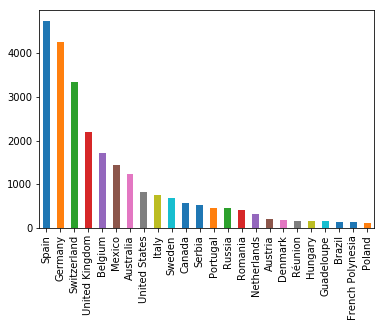

In [14]:
count[1:25].plot.bar()

In [15]:
dico = count.index
print(dico)
dico = dico.to_frame()
print(dico.head())
print(dico.shape) # 295

Index(['France', 'Spain', 'Germany', 'Switzerland', 'United Kingdom',
       'Belgium', 'Mexico', 'Australia', 'United States', 'Italy',
       ...
       'Other-日本', 'de:Frankrike', 'Guatemala', 'fr:Auchan', 'fr:Nyons',
       'Namibia', 'Hungria', 'it:Allemagne', 'El Salvador', 'Ελλάδα'],
      dtype='object', length=294)
                             0
France                  France
Spain                    Spain
Germany                Germany
Switzerland        Switzerland
United Kingdom  United Kingdom
(294, 1)


In [16]:
#
#dico.index.names = ['destination']
#dico.set_index('index')
#dico['destination'] = dico[0]
#dico.rename(columns={0: 'destination'})
dico.columns = ['destination']
dico.head()

,destination
France,France
Spain,Spain
Germany,Germany
Switzerland,Switzerland
United Kingdom,United Kingdom


In [17]:
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="specify_your_app_name_here")

from geopy.extra.rate_limiter import RateLimiter
geocode = RateLimiter(geolocator.geocode, min_delay_seconds=5)
#df['location'] = df['name'].apply(geocode)

In [18]:
print(geolocator.geocode('France'))
#geolocator.geocode('Canada')
#geolocator.geocode('united-kingdom')
#geolocator.geocode('United Kingdom')
#geolocator.geocode('belgien')
#geolocator.geocode('brossard-quebec')
#geolocator.geocode('etats-unis')
#geolocator.geocode('United States')
print(geolocator.geocode('Algeria'))
print(geolocator.geocode('India'))

France métropolitaine, France
ⵍⵣⵣⴰⵢⴻⵔ الجزائر
India


In [19]:
geolocator.geocode('Algeria')
# give an output that have to be read from right to left !!

Location(ⵍⵣⵣⴰⵢⴻⵔ الجزائر, (28.0000272, 2.9999825, 0.0))

In [20]:
geolocator.geocode('India')

Location(India, (22.3511148, 78.6677428, 0.0))

In [21]:
#geolocator.geocode('fr:Suisse-valais')
geolocator.geocode('Suisse-valais')
# remove fr: or xx: before coutry (here fr:Suisse-valais is not recognized)

Location(Valais/Wallis, Schweiz/Suisse/Svizzera/Svizra, (46.2303063, 7.6605757, 0.0))

In [22]:
#geolocator.geocode('nl:France-others')
#geolocator.geocode('France-others')

#geolocator.geocode('fr:Leclerc-bois-d-arcy-france')
geolocator.geocode('Leclerc-bois-d-arcy-france')

In [23]:
#geolocator.geocode('fr:Grande-bretagne-uk')
geolocator.geocode('Grande-bretagne-uk')

#geolocator.geocode('fr:Polyensie-francaise')
geolocator.geocode('Polyensie-francaise')

In [24]:
# tests
geolocator.geocode('es:Vereinigtes-konigreich ')


Location(EHS, Austhorpe Road, Cross Gates, Leeds, Yorkshire and the Humber, England, LS15 8DX, UK, (53.8071494, -1.4490809, 0.0))

In [25]:
# the gecode function will take approximatively 5 min to compute (1 sec between each request)

In [26]:
dico.head()

,destination
France,France
Spain,Spain
Germany,Germany
Switzerland,Switzerland
United Kingdom,United Kingdom


In [27]:
dico['Coord'] = dico['destination'].apply(lambda x: geocode(x))

In [28]:
dico_save = dico

In [29]:
dico['Point'] = dico['Coord'].apply(lambda x: tuple(x.point) if x else None)
dico['Coord_x'] = dico['Point'].apply(lambda x: x[0] if x else None)
dico['Coord_y'] = dico['Point'].apply(lambda x: x[1] if x else None)

In [30]:
dico

,destination,Coord,Point,Coord_x,Coord_y
France,France,"(France métropolitaine, France, (46.603354, 1....","(46.603354, 1.8883335, 0.0)",46.603354,1.888334
Spain,Spain,"(España, (39.3262345, -4.8380649))","(39.3262345, -4.8380649, 0.0)",39.326234,-4.838065
Germany,Germany,"(Deutschland, Europe, (51.0834196, 10.4234469))","(51.0834196, 10.4234469, 0.0)",51.083420,10.423447
Switzerland,Switzerland,"(Schweiz/Suisse/Svizzera/Svizra, (46.7985624, ...","(46.7985624, 8.2319736, 0.0)",46.798562,8.231974
United Kingdom,United Kingdom,"(UK, (54.7023545, -3.2765753))","(54.7023545, -3.2765753, 0.0)",54.702354,-3.276575
Belgium,Belgium,"(België / Belgique / Belgien, (50.6402809, 4.6...","(50.6402809, 4.6667145, 0.0)",50.640281,4.666715
Mexico,Mexico,"(Ciudad de México, Cuauhtémoc, 06060, México, ...","(19.4326009, -99.1333416, 0.0)",19.432601,-99.133342
Australia,Australia,"(Australia, (-24.7761086, 134.755))","(-24.7761086, 134.755, 0.0)",-24.776109,134.755000
United States,United States,"(USA, (39.7837304, -100.4458825))","(39.7837304, -100.4458825, 0.0)",39.783730,-100.445882
Italy,Italy,"(Italia, (42.6384261, 12.674297))","(42.6384261, 12.674297, 0.0)",42.638426,12.674297


In [32]:
dico.shape

(294, 5)

In [33]:
dico.to_csv('Destination-Coordinate.csv')